In [1]:

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
list=['Biopsy','Smokes',
'HC',
'IUD',
'STDs',
'Dx:CIN',
'Dx',
'Hinselmann',
'Schiller',
'Citology',
'Age',
'NSP',
'FSI',
'NPRE',
'SY',
'SmokesPY',
]

In [3]:
df= pd.read_csv("STOM_without_normalization.csv")
df=df[list]
df.head()

,Biopsy,Smokes,HC,IUD,STDs,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Age,NSP,FSI,NPRE,SY,SmokesPY
0,0,0,0,0,0,0,0,0,0,0,18,4,15,1,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,15,1,14,1,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,34,1,17,1,0.0,0.0
3,0,1,1,0,0,0,0,0,0,0,52,5,16,4,37.0,37.0
4,0,0,1,0,0,0,0,0,0,0,46,3,21,4,0.0,0.0


In [4]:
X=df.drop(['Biopsy'],axis = 1 )
y=df['Biopsy']

In [5]:
# Gloabl 

In [6]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=30)
RF.fit(X,y)

RandomForestClassifier(max_depth=30)

In [7]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X)

In [8]:
X.columns

Index(['Smokes', 'HC', 'IUD', 'STDs', 'Dx:CIN', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Age', 'NSP', 'FSI', 'NPRE', 'SY', 'SmokesPY'],
      dtype='object')

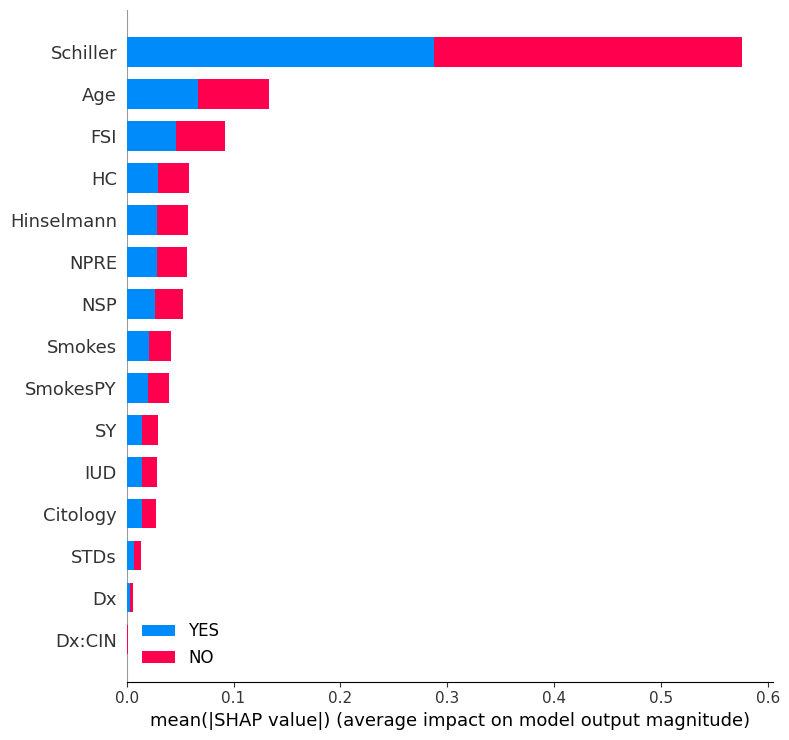

In [9]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= ['YES','NO'], feature_names = X.columns)

In [10]:
#shap.summary_plot(shap_values, X_train, feature_names=features)

In [11]:
#shap.summary_plot(shap_values, X, feature_names=X.columns)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
import xgboost
XG = xgboost.XGBClassifier(objective="binary:logistic")
XG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


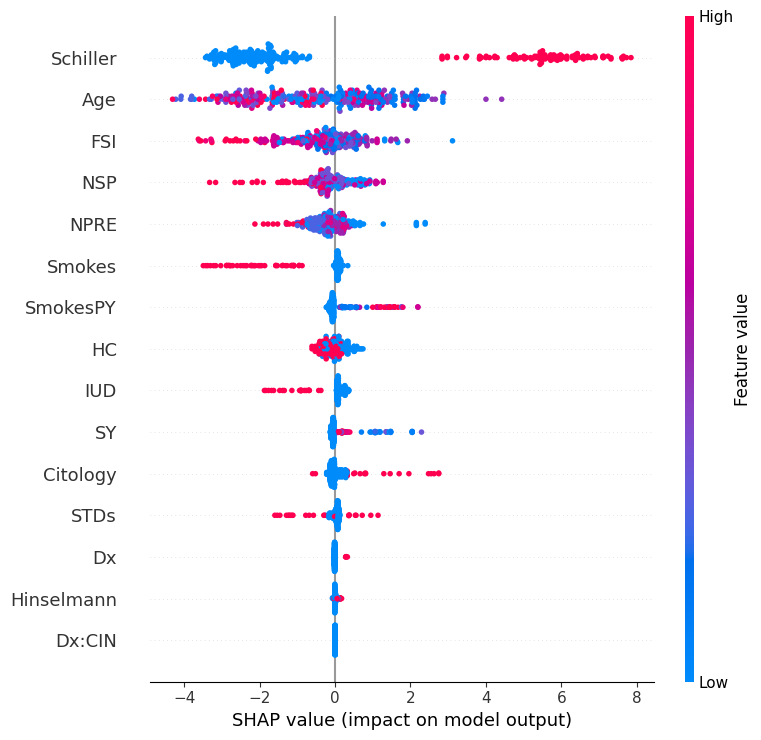

In [14]:
shap_values = shap.TreeExplainer(XG).shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [15]:
explainer.expected_value

array([0.49955903, 0.50044097])

Many methods are utilized to explain the prediction at the instance level. In this section, we provide several methods to explain the model in terms of instances, such
•	force plot
•	water full plot
•	summary plot


In [16]:
xgb_explainer = shap.TreeExplainer(
    XG, X_train, feature_names=X_train.columns.tolist()
)
shap_explainer_values = xgb_explainer(X_test, y_test)

In [17]:
shap_explainer_values.shape

(282, 15)

In [18]:
len(shap_explainer_values)

282

In [19]:
y_test

1079    1
639     0
799     1
1142    1
301     0
       ..
1088    1
171     0
236     0
1401    1
49      0
Name: Biopsy, Length: 282, dtype: int64

### If y=0

In [25]:
shap.initjs()  # don't forget to enable JavaScript
shap.force_plot(shap_explainer_values[1])

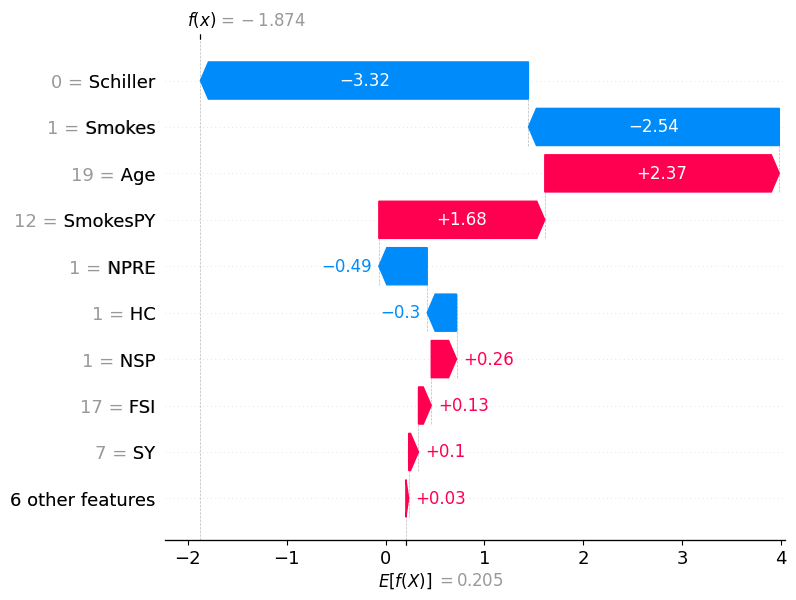

In [21]:
shap.waterfall_plot(shap_explainer_values[1])

### If y=1

In [28]:
shap.initjs()  # don't forget to enable JavaScript
shap.force_plot(shap_explainer_values[3])

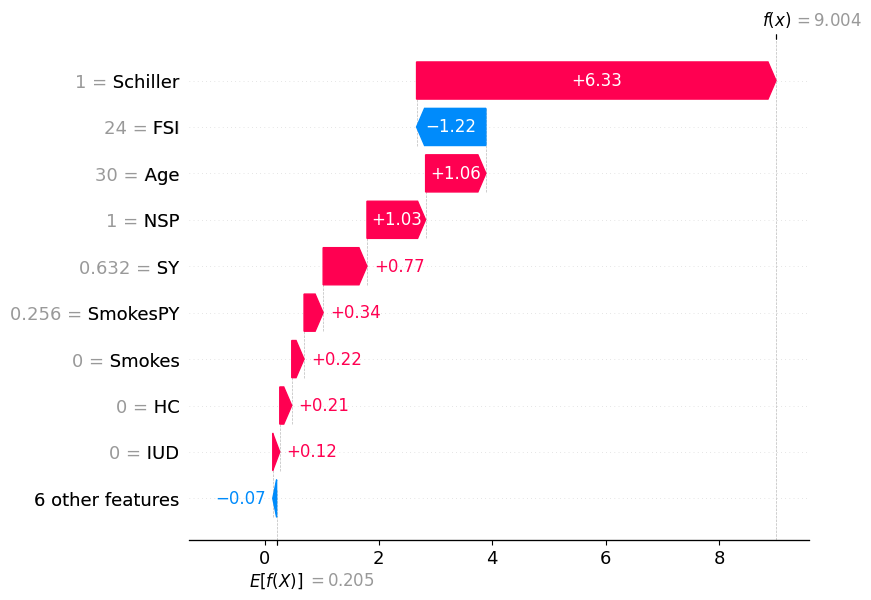

In [23]:
shap.waterfall_plot(shap_explainer_values[2])